In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [78]:
train_csv = pd.read_csv('Titanic_train.csv')
train_csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
train_csv.drop(['Name','Ticket'],axis=1,inplace=True)

In [80]:
train_csv

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [81]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [82]:
train_csv['Cabin'] = train_csv['Cabin'].fillna('B96')

In [83]:
train_csv['Embarked'] = train_csv['Embarked'].fillna('S')

In [84]:
train_csv['Age'] = train_csv['Age'].fillna(train_csv['Age'].median())

In [85]:
train_csv.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
labenc = LabelEncoder()

In [88]:
train_csv['Cabin'] = labenc.fit_transform(train_csv['Cabin'])

In [89]:
train_csv1= pd.get_dummies(train_csv[['Sex','Embarked']],dtype=int)

In [90]:
train_csv.drop(['Sex','Embarked'],axis=1,inplace=True)

In [91]:
df=train_csv.join(train_csv1,how='left')

In [92]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,47,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,82,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,47,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,56,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,47,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,47,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,30,1,0,0,0,1
888,889,0,3,28.0,1,2,23.4500,47,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,61,0,1,1,0,0


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Cabin'}>],
       [<Axes: title={'center': 'Sex_female'}>,
        <Axes: title={'center': 'Sex_male'}>,
        <Axes: title={'center': 'Embarked_C'}>,
        <Axes: title={'center': 'Embarked_Q'}>],
       [<Axes: title={'center': 'Embarked_S'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

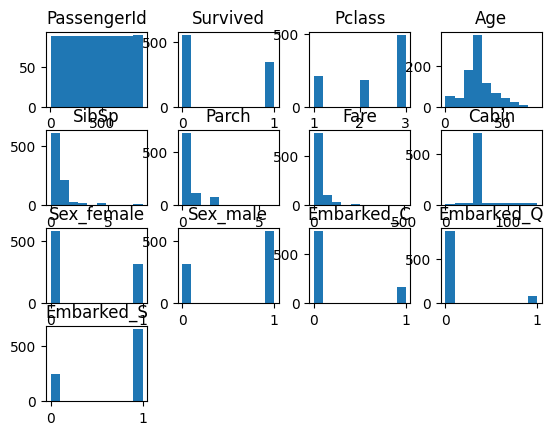

In [93]:
df.hist(grid=False)

<Axes: ylabel='Density'>

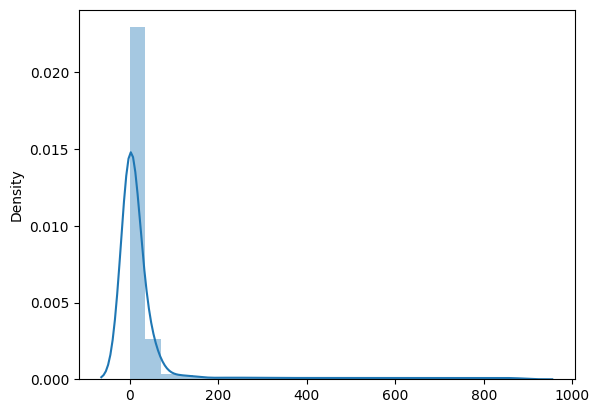

In [94]:
sns.distplot(df,bins=25)

In [95]:
#scaling
from sklearn.preprocessing import StandardScaler

In [96]:
std = StandardScaler()

In [97]:
df_arr = std.fit_transform(df)

In [98]:
df1 = pd.DataFrame(df_arr,columns=df.columns)
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-1.730108,-0.789272,0.827377,-0.565736,0.432793,-0.473674,-0.502445,-0.285201,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.726220,1.266990,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.181971,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,-1.722332,1.266990,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-0.285201,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.718444,1.266990,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.092072,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,-1.714556,-0.789272,0.827377,0.433312,-0.474545,-0.473674,-0.486337,-0.285201,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,-0.285201,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,1.718444,1.266990,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,-0.997828,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,1.722332,-0.789272,0.827377,-0.104637,0.432793,2.008933,-0.176263,-0.285201,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,1.726220,1.266990,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.301668,-0.737695,0.737695,2.074505,-0.307562,-1.623803


<Axes: ylabel='Density'>

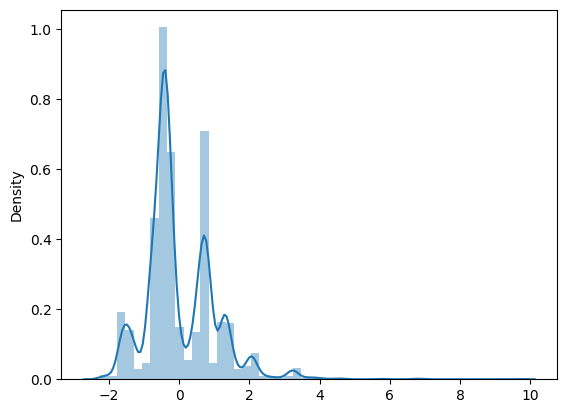

In [100]:
sns.distplot(df1)

In [101]:
df1.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.018030,-0.042939,0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.177538,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.253872,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.062374,-0.081163,0.081163,0.030248,-0.031415,-0.006729
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.005527,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,0.023114,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.094475,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Cabin,-0.018030,0.177538,-0.253872,0.062374,-0.005527,0.023114,0.094475,1.000000,0.103276,-0.103276,-0.005172,-0.049039,0.035391
Sex_female,-0.042939,0.543351,-0.131900,-0.081163,0.114631,0.245489,0.182333,0.103276,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,0.042939,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,-0.103276,-1.000000,1.000000,-0.082853,-0.074115,0.119224


<Axes: >

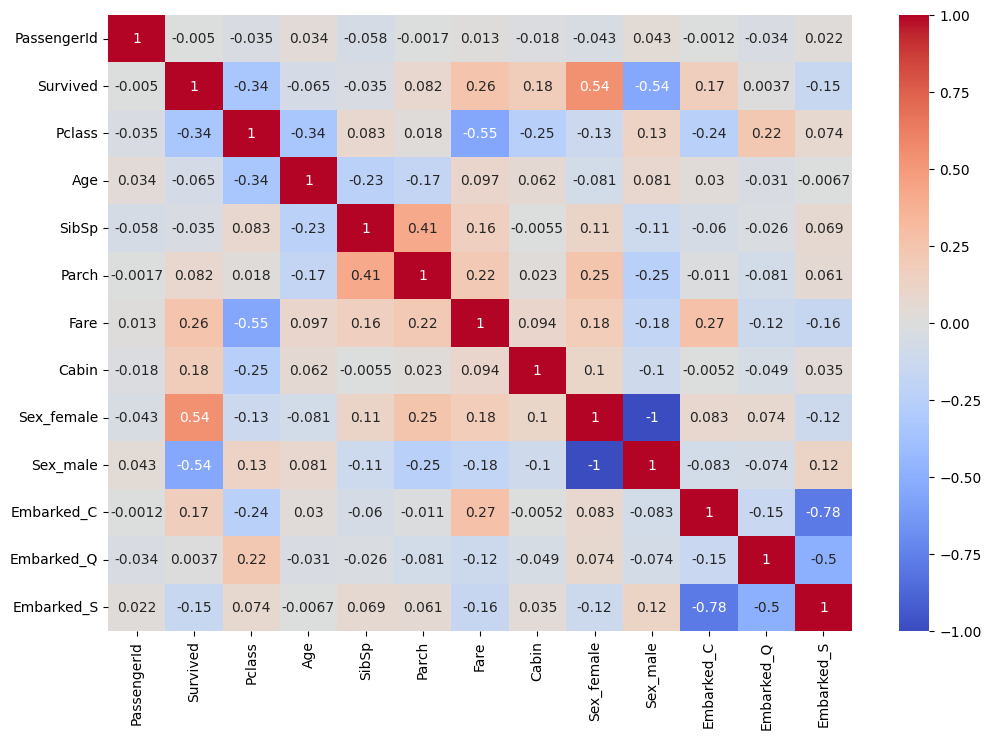

In [103]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

In [140]:
features = df1.drop('Survived',axis=1)
features

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-1.730108,0.827377,-0.565736,0.432793,-0.473674,-0.502445,-0.285201,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.726220,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.181971,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,-1.722332,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-0.285201,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.718444,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.092072,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,-1.714556,0.827377,0.433312,-0.474545,-0.473674,-0.486337,-0.285201,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,-0.285201,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,1.718444,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,-0.997828,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,1.722332,0.827377,-0.104637,0.432793,2.008933,-0.176263,-0.285201,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,1.726220,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.301668,-0.737695,0.737695,2.074505,-0.307562,-1.623803


In [143]:
target = df['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split

In [146]:
x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.8,random_state=50)

In [147]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 12)
(179, 12)
(712,)
(179,)


## LGBM (LightGB Model)

In [218]:
import lightgbm as lgbm
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [237]:
lgbm_model = lgbm.LGBMClassifier(n_estimators=80,min_child_weight=2,max_depth=2,learning_rate=0.2)

In [238]:
lgbm_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 264, number of negative: 448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(learning_rate=0.2, max_depth=2, min_child_weight=2,
               n_estimators=80)

In [239]:
ypred = lgbm_model.predict(x_test)

In [240]:
accuracy_score(y_test,ypred)

0.8212290502793296

In [242]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       101
           1       0.88      0.68      0.77        78

    accuracy                           0.82       179
   macro avg       0.84      0.81      0.81       179
weighted avg       0.83      0.82      0.82       179



<Axes: >

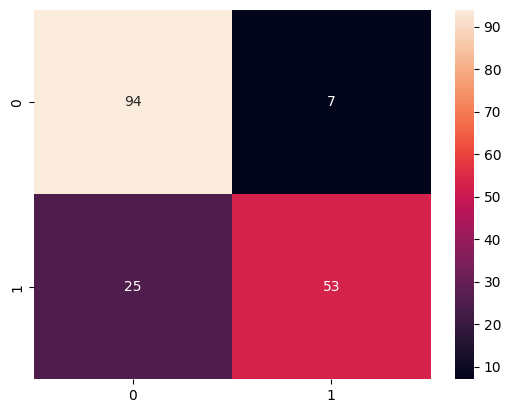

In [243]:
sns.heatmap(confusion_matrix(y_test,ypred),annot=True)

we achievied 82% of accuracy score with random parameters of learning_rate = 0.2,max_depth=2,min_child_weight=2,n_estimators=80

In [223]:
#lets see what grid search gives us 
from sklearn.model_selection import GridSearchCV

In [224]:
params = {'learning_rate':[0.2,0.3,0.4,0.5], 'max_depth':[2,3,4,5], 'min_child_weight':[2,3,4,5],'n_estimators':[80,60,70,90]}

In [225]:
grid = GridSearchCV(lgbm_model,params)

 the gridsearch is giving us {'learning_rate': 0.2,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 60}

In [228]:
lgbm_model = lgbm.LGBMClassifier(n_estimators=60,min_child_weight=3,max_depth=4,learning_rate=0.2)
lgbm_model.fit(x_train,y_train)
ypred = lgbm_model.predict(x_test)

[LightGBM] [Info] Number of positive: 264, number of negative: 448
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [231]:
accuracy_score(y_test,ypred)

0.8044692737430168

In [232]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       101
           1       0.85      0.67      0.75        78

    accuracy                           0.80       179
   macro avg       0.82      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [177]:
#we achievied 80% of accuracy from gridsearch model

## XGBoost

In [202]:
import xgboost as xgb

In [203]:
xgb=xgb.XGBClassifier(n_estimators=80,min_child_rate=2,max_depth=2,learning_rate=0.2)

In [204]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_rate=2, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=80,
              n_jobs=None, num_parallel_tree=None, ...)

In [205]:
ypred = xgb.predict(x_test)

In [206]:
accuracy_score(y_test,ypred)

0.8100558659217877

In [187]:
#we achieved 81% of accuracy with the XGBoost model with parameter (n_estimators=80,min_child_rate=2,max_depth=2,learning_rate=0.2)

In [188]:
grid1 = GridSearchCV(xgb,params)

In [189]:
grid1.fit(x_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.2, max_bi...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_rate=2,
                                     min_child_weight=None, missing=nan,
                                     monotone_constraints=None,
                                     multi_strategy=None, n_estimators=80,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5],
                         'max_depth': [2, 3, 4, 5],
                         'min_child_weight': [2, 3, 4, 5],
                         'n_estimators': [80, 60, 70, 90]})

In [190]:
grid1.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 60}

the gridsearch model gave us the parmas = {'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 60}

In [207]:
xgb1=xgboost.XGBClassifier(n_estimators=60,min_child_rate=3,max_depth=5,learning_rate=0.2)

In [208]:
xgb1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_rate=3, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=60,
              n_jobs=None, num_parallel_tree=None, ...)

In [209]:
ypred = xgb1.predict(x_test)

In [210]:
accuracy_score(y_test,ypred)

0.8044692737430168

In [212]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       101
           1       0.85      0.67      0.75        78

    accuracy                           0.80       179
   macro avg       0.82      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [213]:
confusion_matrix(y_test,ypred)

array([[92,  9],
       [26, 52]], dtype=int64)

<Axes: >

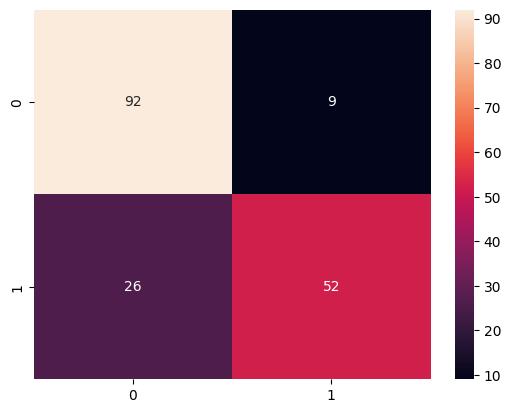

In [215]:
sns.heatmap(confusion_matrix(y_test,ypred),annot=True)